In [1]:
#%matplotlib inline
import pandas as pd
import numpy as np
import distribution_generator as dg
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches



from random import lognormvariate, normalvariate

from sklearn.neighbors import KernelDensity

import imports

import os

from IPython.display import Audio
sound_file = './call.wav'

In [2]:
ALLERT = Audio(url=sound_file, autoplay=True)

KS tests for Cassandra runs

HERE I START WORKING WITH NEW RD FORMAT

***********************************************************************



In [3]:
def plotDensity(densities, log_flag = False, height = 4, width = 12, left = None, right = None, axes_limits = None,
               colors = None, name = None):
    
    if type(densities[0]) != list and type(densities[0]) != np.ndarray:
        densities = [densities]
    fig = plt.figure(figsize=(width, height))
    ax = fig.add_subplot(1,1,1)

    if axes_limits:
        ax.axis(axes_limits)
        ax = plt.gca()
        ax.set_autoscale_on(False)

    if left is None:
        left = 0
    if right is None:
        right = len(densities[0])
        
    for i in range(len(densities)):
        density = densities[i]
        if colors is None:
            ax.plot(density[left : right])
        else:
            ax.plot(density[left : right], colors[i])
   
    if not name is None: 
        fig.savefig(name)
    if log_flag:
        ax.set_xscale('log')
        ax.set_yscale('log')
    plt.show()

In [4]:
runs_dir = "/home/anton/azul/New_config_latency_runs/all0408RD/"


runs = dict(zip(['Dev', 'Granada', 'Highlander'], [[],[],[]]))

for run_file_name in os.listdir(runs_dir):
    if run_file_name.endswith("READ.rd"):
        x, curr_pdf, curr_cdf = imports.readRD(run_file_name, runs_dir, scale = True)
        
        
        if run_file_name.split('-')[3] == '600':
            runs[run_file_name.split('-')[0]].insert(0, curr_pdf)
        if run_file_name.split('-')[3] == '1800':
            runs[run_file_name.split('-')[0]].append(curr_pdf)
        
        print run_file_name

asasas
Granada-d-10000-600-2016.04.08-13.27.33-ycsb-run-READ.rd
asasas
Highlander-d-10000-1800-2016.04.08-09.16.33-ycsb-run-READ.rd
asasas
Dev-d-10000-1800-2016.04.08-15.59.41-ycsb-run-READ.rd
asasas
Highlander-d-10000-1800-2016.04.08-08.44.09-ycsb-run-READ.rd
asasas
Granada-d-10000-600-2016.04.08-13.15.11-ycsb-run-READ.rd
asasas
Dev-d-10000-600-2016.04.08-15.34.53-ycsb-run-READ.rd
asasas
Dev-d-10000-600-2016.04.08-15.47.16-ycsb-run-READ.rd
asasas
Granada-d-10000-1800-2016.04.08-14.44.42-ycsb-run-READ.rd
asasas
Highlander-d-10000-600-2016.04.08-08.19.19-ycsb-run-READ.rd
asasas
Highlander-d-10000-1800-2016.04.08-09.48.58-ycsb-run-READ.rd
asasas
Granada-d-10000-600-2016.04.08-13.02.39-ycsb-run-READ.rd
asasas
Dev-d-10000-600-2016.04.08-15.22.26-ycsb-run-READ.rd
asasas
Granada-d-10000-1800-2016.04.08-13.39.55-ycsb-run-READ.rd
asasas
Highlander-d-10000-600-2016.04.08-08.06.57-ycsb-run-READ.rd
asasas
Granada-d-10000-1800-2016.04.08-14.12.18-ycsb-run-READ.rd
asasas
Highlander-d-10000-600-2016

In [5]:
runs_dir = "/home/anton/azul/New_config_latency_runs/all0408RD/"


runs_ins = dict(zip(['Dev', 'Granada', 'Highlander'], [[],[],[]]))

for run_file_name in os.listdir(runs_dir):
    if run_file_name.endswith("INSERT.rd"):
        x, curr_pdf, curr_cdf = imports.readRD(run_file_name, runs_dir, scale = True)
        
        
        if run_file_name.split('-')[3] == '600':
            runs_ins[run_file_name.split('-')[0]].insert(0, curr_pdf)
        if run_file_name.split('-')[3] == '1800':
            runs_ins[run_file_name.split('-')[0]].append(curr_pdf)
        
        print run_file_name

asasas
Granada-d-10000-600-2016.04.08-13.15.11-ycsb-run-INSERT.rd
asasas
Granada-d-10000-1800-2016.04.08-14.44.42-ycsb-run-INSERT.rd
asasas
Dev-d-10000-600-2016.04.08-15.34.53-ycsb-run-INSERT.rd
asasas
Dev-d-10000-1800-2016.04.08-15.59.41-ycsb-run-INSERT.rd
asasas
Granada-d-10000-1800-2016.04.08-14.12.18-ycsb-run-INSERT.rd
asasas
Highlander-d-10000-600-2016.04.08-08.31.44-ycsb-run-INSERT.rd
asasas
Highlander-d-10000-1800-2016.04.08-08.44.09-ycsb-run-INSERT.rd
asasas
Highlander-d-10000-600-2016.04.08-08.06.57-ycsb-run-INSERT.rd
asasas
Granada-d-10000-1800-2016.04.08-13.39.55-ycsb-run-INSERT.rd
asasas
Dev-d-10000-600-2016.04.08-15.22.26-ycsb-run-INSERT.rd
asasas
Granada-d-10000-600-2016.04.08-13.27.33-ycsb-run-INSERT.rd
asasas
Dev-d-10000-600-2016.04.08-15.47.16-ycsb-run-INSERT.rd
asasas
Highlander-d-10000-600-2016.04.08-08.19.19-ycsb-run-INSERT.rd
asasas
Highlander-d-10000-1800-2016.04.08-09.48.58-ycsb-run-INSERT.rd
asasas
Highlander-d-10000-1800-2016.04.08-09.16.33-ycsb-run-INSERT.rd
a

In [29]:
def sampleFromDensity(densities, sample_size = 1000, scaling = False):
    sample = np.empty(0)
    for density in densities:
        if scaling:
            density = density / sum(density)
        curr_sample = np.random.choice(range(len(density)), sample_size, p = density)
        sample = np.hstack((sample, curr_sample))
    return sample

In [7]:
len(sampleFromDensity(runs['Highlander']))

6000

In [8]:
def percentileBootstrap(pdf, percentile, percentiles_sample_size = 10, sample_size = 1000):
    percentiles = []
    for i in range(percentiles_sample_size):
        percentiles.append(np.percentile(sampleFromDensity(pdf / sum(pdf),
                                                           sample_size), percentile))
    return percentiles

In [9]:
def buildtrustedInterval(percentile_sample, interval):
    percentile_std = np.std(percentile_sample)
    percentile_mean = np.mean(percentile_sample)
    
    return percentile_mean,stats.norm.ppf(1 - (1 - interval)/ 2, loc = percentile_mean, scale = percentile_std), 2 *percentile_mean - stats.norm.ppf(1 - (1 - interval)/ 2, loc = percentile_mean, scale = percentile_std)

In [33]:
def percentiles_from_pdf(pdf, perc, strat = 'first_higher'):
    perc_normed = float(perc)/ 100
    curr_perc = 0.0

    i = 0
    last_grow = 0
    while curr_perc < perc_normed and i < len(pdf):
        curr_perc += pdf[i]
        if pdf[i] > 0 and curr_perc < perc_normed:
            last_grow = i
        i += 1

    if curr_perc >= perc_normed:
        if strat == 'first_higher':
            return i
        else:
            return last_grow
    else:
        return -1

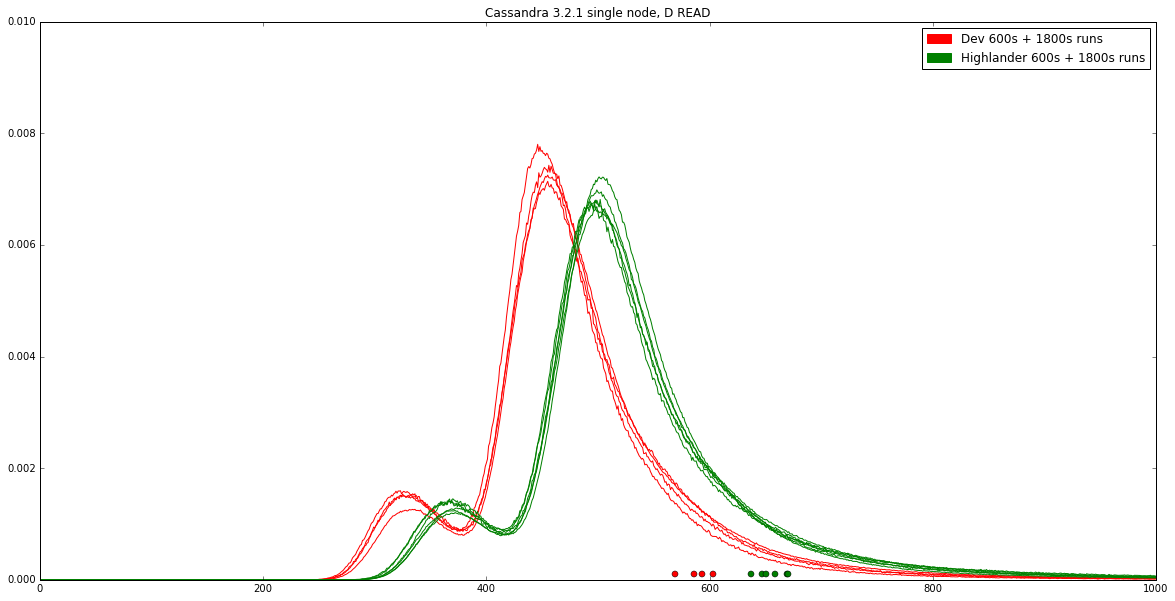

In [43]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,1,1)

axes_limits = [0,1000, 0, 0.01]
colors = ['r']*4 + ['g']*6 + ['b']*6
densities = runs['Dev']  + runs['Granada']

if len(axes_limits) == 4: 
    ax.axis(axes_limits)
    ax = plt.gca()
    ax.set_autoscale_on(False)

for i in range(len(densities)):
    density = densities[i]
    if colors is None:
        ax.plot(density)
    else:
        ax.plot(density, colors[i])

red_patch = mpatches.Patch(color='red', label='Dev 600s + 1800s runs')
#blue_patch = mpatches.Patch(color='blue', label='Granada 600s + 1800s runs')
green_patch = mpatches.Patch(color='green', label='Highlander 600s + 1800s runs')
ax.legend(handles=[red_patch,green_patch])
ax.set_title("Cassandra 3.2.1 single node, D READ", loc = 'center')


for pdf in runs['Dev']: 
    ax.plot(percentiles_from_pdf(pdf, 90), 0.0001, 'ro')

for pdf in runs['Granada']: 
    ax.plot(percentiles_from_pdf(pdf, 90), 0.0001, 'go')
plt.show()


fig.savefig('DevGran.png')

In [7]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,1,1)

axes_limits = [20000,50000, 0, 0.00001]
colors = ['r']*4 + ['g']*6 + ['b']*6
densities_ins = runs_ins['Dev']# + runs_ins['Highlander'] + runs_ins['Granada']

if len(axes_limits) == 4: 
    ax.axis(axes_limits)
    ax = plt.gca()
    ax.set_autoscale_on(False)

for i in range(len(densities_ins)):
    density = densities_ins[i]
    if colors is None:
        ax.plot(density)
    else:
        ax.plot(density, colors[i])

red_patch = mpatches.Patch(color='red', label='Dev 600s + 1800s runs')
blue_patch = mpatches.Patch(color='blue', label='Granada 600s + 1800s runs')
green_patch = mpatches.Patch(color='green', label='Highlander 600s + 1800s runs')
ax.legend(handles=[red_patch, blue_patch, green_patch])
ax.set_title("Cassandra 3.2.1 single node D INSERT", loc = 'center')

fig.savefig('DevHlanderGran_Ins.png')

Here's how the Granada tail looks

This Highlander run is better than others and it is the last one 
Highlander-d-10000-1800-2016.04.08-09.48.58-ycsb-run-READ.rd

It's also last for Granada
Granada-d-10000-1800-2016.04.08-14.12.18-ycsb-run-READ.rd

For Dev it's not
Dev-d-10000-600-2016.04.08-15.47.16-ycsb-run-READ.rd

### PLAY WITH LOGNORMAL

In [12]:
def lgnrm(x, mu = 1, sigma = 1):
    return 1.0 / (np.sqrt(2*np.pi)*sigma*x)  * np.exp(-(np.log(x) - mu)**2 / (2*sigma**2) )

def lgnrmMix(x, p1, p2, mu1, mu2, sigma1, sigma2):
    return p1*lgnrm(x,mu1,sigma1) + p2*lgnrm(x,mu2,sigma2)

In [147]:
from itertools import product

mu1_range = np.linspace(5.5, 8, 10)
mu2_range = np.linspace(6, 9, 15)
sigma1_range = np.linspace(6, 10, 10)
sigma2_range = np.linspace(6, 12, 15)
p1 = 0.091
p2 = 1 - p1

min_err = 10000
min_mu1 = 0
min_mu2 = 0
min_sigma1 = 0
min_sigma2 = 0

for mu1,mu2,sigma1,sigma2 in product(mu1_range,mu2_range, sigma1_range, sigma2_range):
    curr_err = np.sum(abs(lgnrmMix(np.arange(1, 1000), p1, p2, mu1, mu2, sigma1, sigma2) - test[1:1000]))
    if curr_err < min_err:
        min_err = curr_err
        min_mu1 = mu1
        min_mu2 = mu2
        min_sigma1 = sigma1
        min_sigma2 = sigma2

In [148]:
print min_mu1
print min_mu2
print min_sigma1
print min_sigma2

5.77777777778
6.21428571429
7.33333333333
6.42857142857


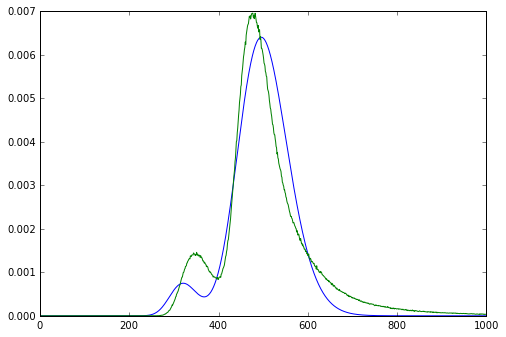

In [149]:
plotDensity([lgnrmMix(np.array(range(1,1000)),p1, p2, min_mu1 , min_mu2,min_sigma1,min_sigma2), test])

In [375]:
mu1_range = np.linspace(6, 6.5, 100)
sigma1_range = np.linspace(0.05, 0.15, 100)
p1_range = np.linspace(0.5, 0.9, 10)

min_err = 10000
min_mu1 = 0
min_mu2 = 0
min_sigma1 = 0
min_sigma2 = 0
min_p1 = 0

for mu1,sigma1,p1 in product(mu1_range, sigma1_range, p1_range):
    curr_err = np.sum(abs(p1 * lgnrm(np.arange(420, 520), mu1, sigma1) - test[420:520]))
    if curr_err < min_err:
        min_err = curr_err
        min_mu1 = mu1
        min_mu2 = mu2
        min_sigma1 = sigma1
        min_sigma2 = sigma2
        min_p1 = p1

In [376]:
print min_mu1
print min_sigma1
print min_p1


6.17676767677
0.080303030303
0.677777777778


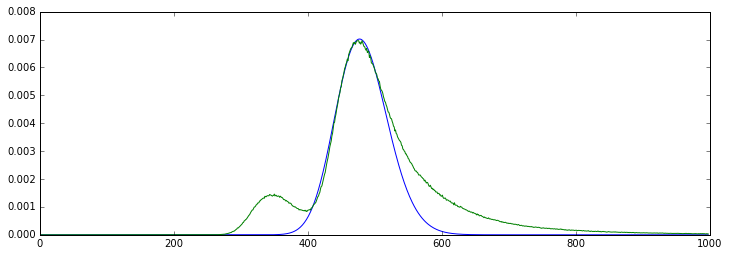

In [387]:
mu_1 = min_mu1
sigma_1 = min_sigma1
p_1 = min_p1

plotDensity([p_1 *lgnrm(np.array(range(1, 1000)),mu_1, sigma_1), test[1:1000]], name = '1iter.png')



In [399]:
test_2 = - p_1 *lgnrm(np.array(range(1, 1000)),mu_1, sigma_1) + test[1:1000]
mu1_range = np.linspace(5, 6.5, 100)
sigma1_range = np.linspace(0.05, 0.1, 100)
p1_range = np.linspace(0.08, 0.11, 10)

min_err = 10000
min_mu1 = 0
min_mu2 = 0
min_sigma1 = 0
min_sigma2 = 0
min_p1 = 0

for mu1,sigma1,p1 in product(mu1_range, sigma1_range, p1_range):
    curr_err = np.sum(abs(p1 * lgnrm(np.arange(320, 420), mu1, sigma1) - test_2[320:420]))
    if curr_err < min_err:
        min_err = curr_err
        min_mu1 = mu1
        min_mu2 = mu2
        min_sigma1 = sigma1
        min_sigma2 = sigma2
        min_p1 = p1

In [400]:
print min_mu1
print min_sigma1
print min_p1


5.86363636364
0.0808080808081
0.103333333333


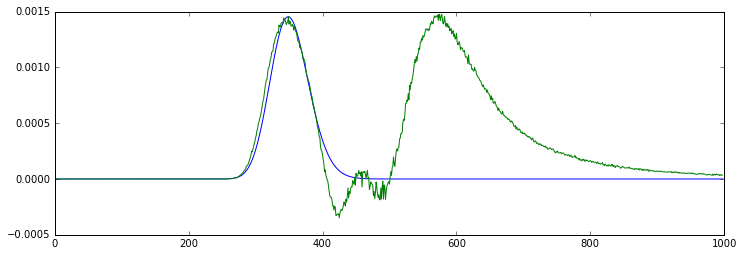

In [401]:
plotDensity([ min_p1 *lgnrm(np.array(range(1, 1000)),min_mu1, min_sigma1), test_2[1:1000]], name = 'iter2.png')

In [393]:
mu_2 = min_mu1
sigma_2 = min_sigma1
p_2 = min_p1


In [394]:
test_3 = test_2 - p_2 *lgnrm(np.array(range(1, 1000)),mu_2, sigma_2)

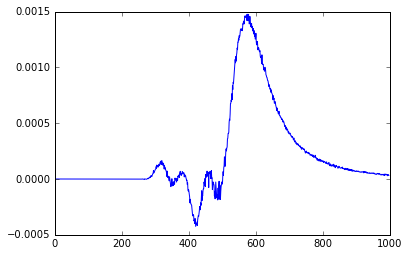

In [395]:
plt.plot(test_3)

In [402]:
mu1_range = np.linspace(5, 6.5, 100)
sigma1_range = np.linspace(0.05, 0.3, 100)
p1_range = np.linspace(0.01, 0.3, 10)

min_err = 10000
min_mu1 = 0
min_mu2 = 0
min_sigma1 = 0
min_sigma2 = 0
min_p1 = 0

for mu1,sigma1,p1 in product(mu1_range, sigma1_range, p1_range):
    curr_err = np.sum(abs(p1 * lgnrm(np.arange(510, 820), mu1, sigma1) - test_3[510:820]))
    if curr_err < min_err:
        min_err = curr_err
        min_mu1 = mu1
        min_mu2 = mu2
        min_sigma1 = sigma1
        min_sigma2 = sigma2
        min_p1 = p1

In [403]:
print min_mu1
print min_sigma1
print min_p1


6.37878787879
0.128282828283
0.235555555556


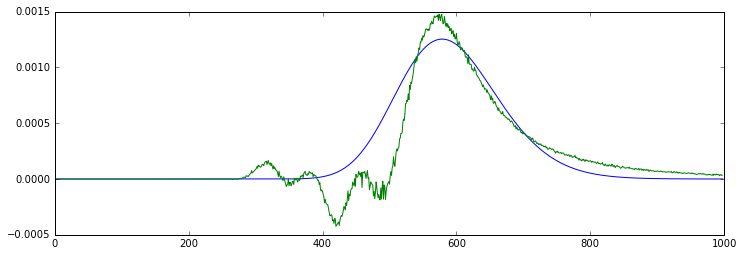

In [404]:
plotDensity([ min_p1 *lgnrm(np.array(range(1, 1000)),min_mu1, min_sigma1), test_3[1:1000]], name = 'iter3.png')

In [366]:
p = np.poly1d(np.polyfit(np.arange(1000), test[:1000], 100 ))

/home/anton/anaconda2/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


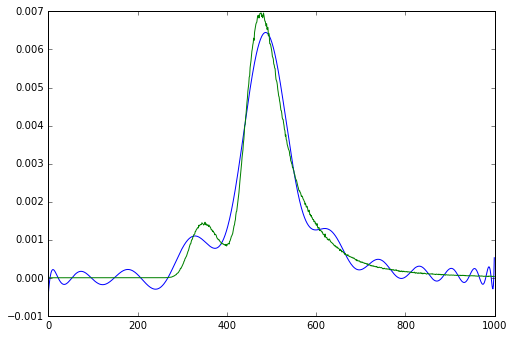

In [367]:
plotDensity([p(np.arange(1000)), test[:1000]])

In [276]:

import scipy.integrate as integrate

result = integrate.quad(lgnrm, 0, 10000, args = (6, 0.3))

print result

(1.0, 4.454159844180103e-13)


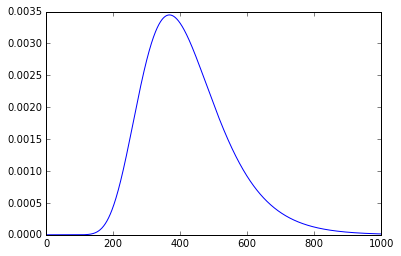

In [273]:
plt.plot(lgnrm(np.arange(1,1000, 1), 6, 0.3))

In [19]:
from sklearn.grid_search import GridSearchCV
import sklearn.cross_validation as CV

params = {'bandwidth' :np.arange(1, 7, 1)}
grid_searcher = GridSearchCV(KernelDensity(), params, cv = 5, n_jobs=-1, verbose = 3)
grid_searcher.fit(samples_for_KDE[:np.newaxis].reshape(-1,1))

print grid_searcher.best_score_
print grid_searcher.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
-93441.4044085
KernelDensity(algorithm='auto', atol=0, bandwidth=6, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)
[CV] bandwidth=1 .....................................................
[CV] bandwidth=1 .....................................................
[CV] bandwidth=1 .....................................................
[CV] bandwidth=1 .....................................................
[CV] bandwidth=2 .....................................................
[CV] bandwidth=1 .....................................................
[CV] bandwidth=2 .....................................................
[CV] bandwidth=2 .....................................................
[CV] ....................... bandwidth=1, score=-53698.036731 -  12.3s[CV] ..................... bandwidth=1, score=-2016526.316603 -  12.0s[CV] ..................... bandwidth=1, score=-58

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished


In [ ]:
kde = KernelDensity()
kde.fit(imports.sampleFromDensity(train_data[0], 1000).reshape(-1,1) )

In [ ]:
plt.plot(np.exp(kde.score_samples(np.linspace(0,200,200).reshape(-1,1))))

In [ ]:
train_data[0].reshape(-1,1).shape

In [ ]:
np.linspace(0,200,200).reshape(-1,1).shape

In [ ]:
(train_data_samples).shape

### GO TRY LN WITH INSERT

In [27]:
from scipy.optimize import curve_fit

In [30]:
popt, pcov = curve_fit(lgnrm, np.arange(1,1000, 1), runs_ins['Highlander'][0][:999])

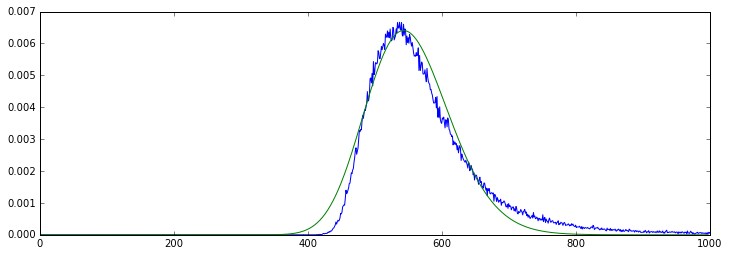

In [35]:
plotDensity([np.log1p(runs_ins['Highlander'][0]),
             lgnrm(np.arange(1,1000, 1), 6.3121, 0.1137)
             
             ],
           axes_limits=[0, 1000, 0, 0.007])

In [54]:
pcov

array([[  4.89828468e-07,   1.86141959e-08],
       [  1.86141959e-08,   3.27249101e-07]])

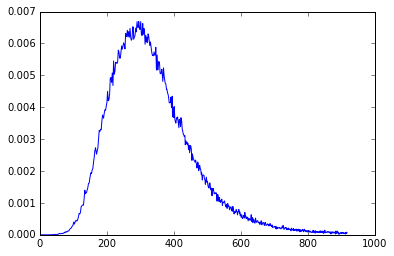

In [67]:
plt.plot((np.log(np.arange(400, 1001, 1))*1000 - 5990).astype(int),(runs_ins['Highlander'][0][400:1001]))
plt.show()

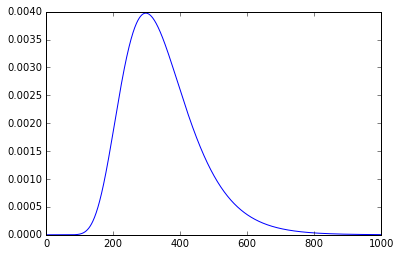

In [76]:
plt.plot(lgnrm(np.arange(1, 1000), 5.8, 0.32))
plt.show()

In [64]:
temp_X = (np.log(np.arange(400, 1001, 1))*1000 - 5990).astype(int)

In [65]:
def lgn(params):
    mu = params[0]
    sigma = params[1]
    
    return sum([abs(lgnrm(x[i], mu, sigma) - runs_ins['Highlander'][0][400 + i]) for i in range(600)])

In [79]:
from scipy.optimize import minimize

In [80]:
params = [6, 0.2]

res = minimize(lgn, params)

In [81]:
res.x

array([ 6. ,  0.2])

### GO TRY KDE AGAIN

In [ ]:
kde = KernelDensity()
kde.fit(imports.sampleFromDensity(train_data[0], 1000).reshape(-1,1) )

In [ ]:
plt.plot(np.exp(kde.score_samples(np.linspace(0,200,200).reshape(-1,1))))

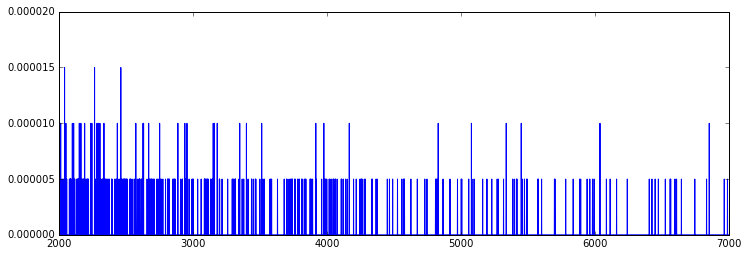

In [137]:
plotDensity([np.log1p(runs_ins['Highlander'][0]),
             lgnrm(np.arange(1,1000, 1), 6.3121, 0.1137)
             
             ],
           axes_limits=[2000, 7000, 0, 0.00002])

In [138]:
kernel_tail = stats.gaussian_kde(imports.sampleFromDensity(runs_ins['Highlander'][0][2000:], 100000))

In [208]:
smoothed_tail = kernel_tail.pdf(np.arange(2000,40000))

In [140]:
kernel_head = stats.gaussian_kde(imports.sampleFromDensity(runs_ins['Highlander'][0][:2000], 100000))

In [141]:
smoothed_head = kernel_head.pdf(np.arange(0, 2000))

In [209]:
smoothed = np.hstack((smoothed_head*sum(runs_ins['Highlander'][0][:2000]),
                                   smoothed_tail[:]*(sum(runs_ins['Highlander'][0][2000:]))))

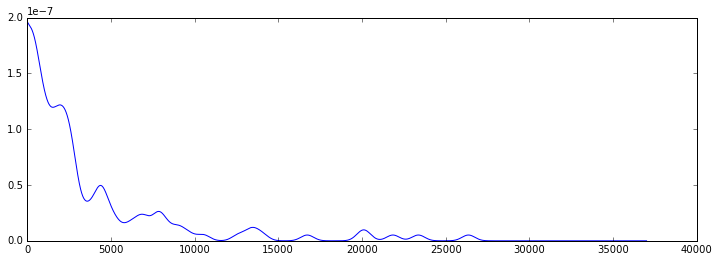

In [210]:
plotDensity([smoothed[3000:],
             ]
            )

In [67]:
def someGaussianDensity(samp):
    trsh = 0
    elongation = 1000
    #kernel_head = stats.gaussian_kde(sampleFromDensity(pdf[:trsh], 100000, scaling=True))
    kernel_tail = stats.gaussian_kde(samp)
    
    #smoothed_head = kernel_head.pdf(np.arange(0, trsh))
    smoothed_tail = kernel_tail.pdf(np.arange(trsh, max(samp) + elongation))
    
    #smoothed_pdf = np.hstack((smoothed_head * sum(pdf[:trsh]), smoothed_tail * sum(pdf[trsh:])))
    return smoothed_tail / sum(smoothed_tail)

In [305]:
pdf_smth = someGaussianDensity(runs["Highlander"][0])

In [306]:
sum(pdf_smth)

0.99999999999999245

In [29]:
plotDensity(pdf_smth,
           axes_limits=[1500, 4000, 0, 0.000003])

NameError: name 'pdf_smth' is not defined

In [211]:
sum(smoothed)

0.99868725302129235

In [184]:
kernel_tail2 = stats.gaussian_kde(imports.sampleFromDensity(runs_ins['Highlander'][0][2000:], 100000), bw_method=2)

In [185]:
smoothed_tail2 = kernel_tail2.pdf(np.arange(2000,15000))

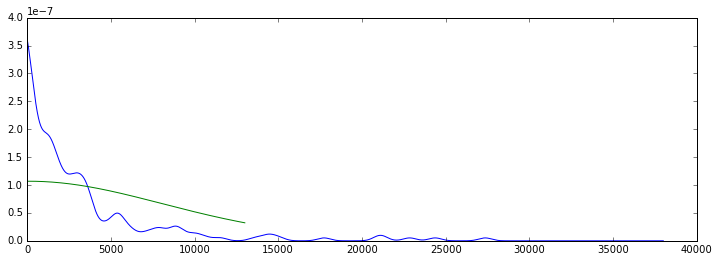

In [212]:
plotDensity([smoothed[2000:],
             smoothed_tail2[:]*sum(runs_ins['Highlander'][0][2000:])]
            )

In [187]:
print sum(smoothed[2000:])
print sum(smoothed_tail2[:]*sum(runs_ins['Highlander'][0][2000:]))

0.000843455145098
0.000982817780233


In [188]:
smoothed2 = np.hstack((smoothed_head*sum(runs_ins['Highlander'][0][:2000]),
                                   smoothed_tail2[:]*(sum(runs_ins['Highlander'][0][2000:]))))

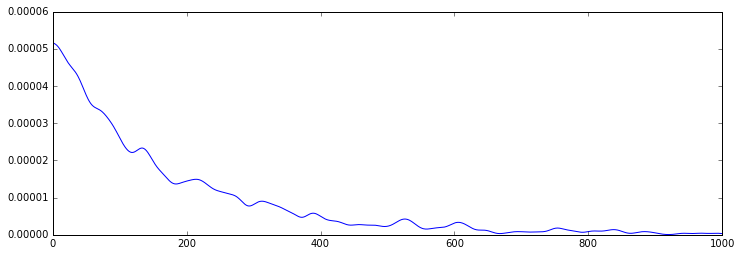

In [213]:
plotDensity([smoothed[1000:2000],
             ]
            )

In [225]:
np.percentile(sampleFromDensity(smoothed, 4000000, scaling=True), 99.99)

10292.00029999949

In [269]:
bins = np.logspace(0, 5,1000)

In [270]:
hist = np.histogram(imports.sampleFromDensity(runs_ins["Highlander"][0], 4000000), density=True, bins=bins)

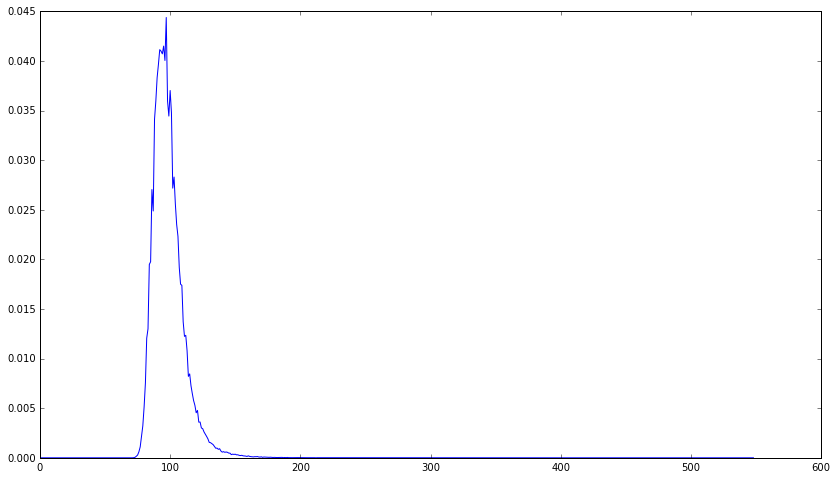

In [275]:
plotDensity([y[450:],
            lgnrm(np.arange(1, 1000), 6.91, 0.098)],
           
           height = 8,
           width = 14)


In [272]:
y = hist[0] / sum(hist[0])


In [181]:
from scipy.optimize import curve_fit

In [182]:
x = np.linspace(1, 5500, 5499)

In [201]:
curve_fit(lgnrm, x, y[4500:] / sum(y[4500:]), p0= (7, 0.1))

(array([ 6.87937231,  0.09820807]),
 array([[  2.07372457e-06,   6.79910903e-08],
        [  6.79910903e-08,   1.38468737e-06]]))

In [200]:
sum(y[4500:])

1.0000000000000009

In [202]:
np.log(1000)

6.9077552789821368

In [ ]:
bins2 = np.logspace(1, 5, )

In [266]:
hist2 = np.histogram(imports.sampleFromDensity(runs_ins["Highlander"][0], 4000000), density=True, bins=bins)

In [267]:
hist3 = np.histogram(sampleFromDensity(hist2[0], 4000000, scaling= True),  density=True, bins=bins)[0]

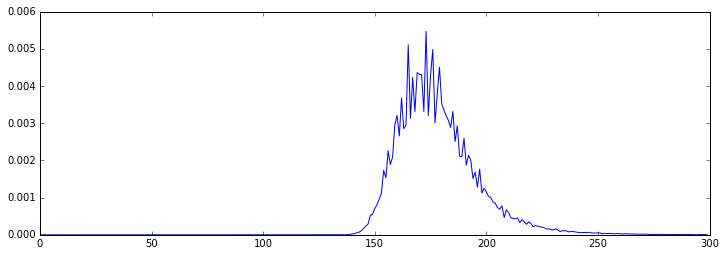

In [268]:
plotDensity(hist3[7300:7600])

In [232]:
hist3

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [217]:
p = 0.5

In [7]:
from statsmodels.nonparametric import bandwidths

In [11]:
bandwidths.bw_scott(np.random.normal(0, 1, 100))

0.44839437551644462

In [55]:
size = 4000000

cum_samp = sampleFromDensity(runs['Highlander'], size)
density = np.histogram(cum_samp, max(cum_samp), density=True)[0]

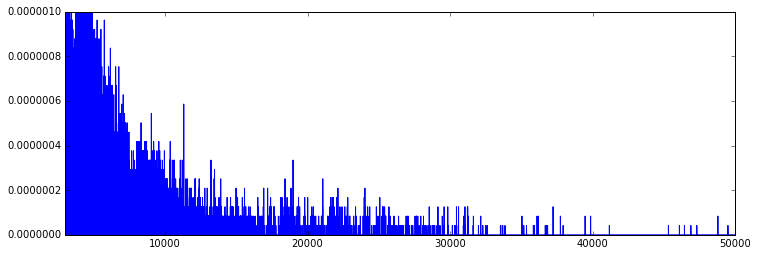

In [58]:
plotDensity(density,
           axes_limits = [3000,50000, 0, 0.000001])

In [72]:
smth_density = someGaussianDensity(cum_samp[::100])

In [71]:
len(cum_samp)

24000000

# Go for hummer

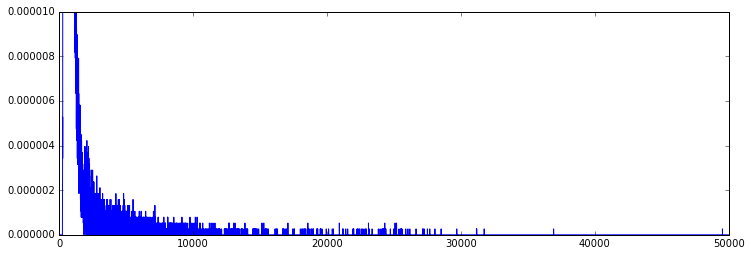

In [11]:
plotDensity(runs['Highlander'][0],
           axes_limits = [0,50000, 0, 0.00001])

In [48]:
mask = runs['Highlander'][0] > 0
np.argmin((runs['Highlander'][0] > 0) == True)

0

In [57]:
np.where(mask)[0]

array([  251,   255,   256, ..., 36927, 49535, 55135])

In [58]:
runs['Highlander'][0]

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [12]:
def searchBoarders(density, i, bw):
    left_boarder = i
    right_boarder = i
    
    if bw % 2 == 0:
        bw += 1
        
    right_saturation = (bw - 1) / 2
    left_saturation = (bw - 1) / 2
    
    while left_saturation > 0 and left_boarder > 0:
        if density[left_boarder] > 0:
            left_saturation -= 1
        left_boarder -= 1
    
    while right_saturation > 0 and right_boarder < len(density) - 1:
        if density[right_boarder] > 0:
            right_saturation -= 1
        right_boarder += 1
        
    if right_saturation == 0 and left_saturation == 0:
        return left_boarder, right_boarder
    elif right_saturation == 0 and left_saturation != 0:
        return max(0, i - right_saturation), right_saturation
    elif left_saturation == 0 and right_saturation != 0:
        return left_saturation, i + i - left_saturation
    else:
        return 0, len(density)

def flattenDensity(density, bw = 3): 
    #max_bw = np.where(density > 0)[0][0]
    new_density = np.zeros(len(density)*2)
    
    saturation = 0
    
    for i in range(len(density)):
        if density[i] == 0:
            pass
        else:
            left_boarder, right_boarder = searchBoarders(density, i, bw)
            for j in range(left_boarder, right_boarder):
                new_density[j] += density[i] / (right_boarder - left_boarder)
    
    return new_density
    


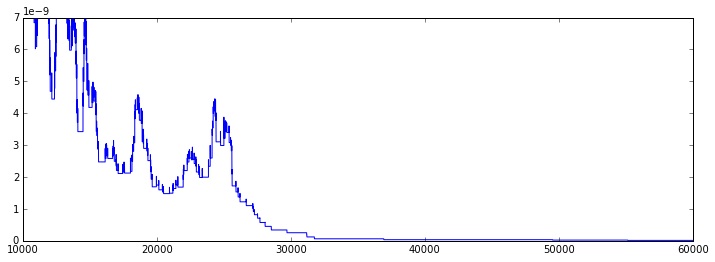

In [13]:
plotDensity([flattenDensity(runs['Highlander'][0], 10)],
             #runs['Highlander'][0]],
        
           axes_limits = [10000,60000, 0, 0.000000007])

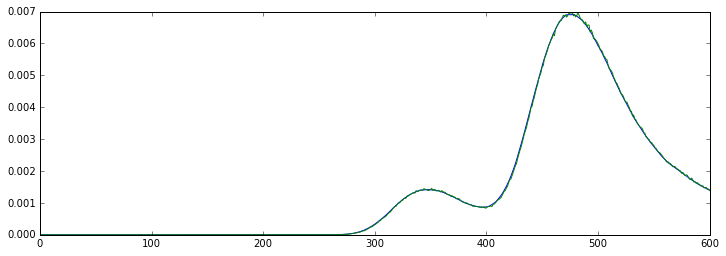

In [14]:
plotDensity([flattenDensity(runs['Highlander'][0], 10),
             runs['Highlander'][0]],
        
           axes_limits = [0,600, 0, 0.007])

In [36]:
check = [515, 650, 1034, 3653, 10807]

In [37]:
check= [491, 627, 968, 2449, 8567]# 24191

In [29]:
import json

In [26]:
a = {'k' : [{'s' : 1, 'd' : 2}, {'a' : 4, 'b' : 5}]}

In [31]:
f = open('123.txt', 'w')

f.write('keys: ')
f.write(' '.join(a.keys()))
f.write("\n")

for key in a:
    for i in range(len(a[key])):
        f.write("\n")

        f.write(json.dumps(a[key][i]))

f.close()

In [32]:
g = open('31.txt', 'w')

g.write(json.dumps(a))

g.close()


In [34]:
d = json.loads(open('31.txt', 'r').read())

In [38]:
d == a

True